<a href="https://colab.research.google.com/github/surbhit20/Deepfake-Detection-using-TensorFlow/blob/main/deepfake_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Libraries 🛠

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d awsaf49/asvpoof-2019-dataset
!kaggle datasets download -d awsaf49/asvspoof-2019-tfrecord-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 23.6G/23.6G [02:33<00:00, 191MB/s]
100% 23.6G/23.6G [02:33<00:00, 165MB/s]
100% 1.03G/1.03G [00:07<00:00, 165MB/s]
100% 1.03G/1.03G [00:07<00:00, 145MB/s]


In [ ]:
!unzip /content/asvpoof-2019-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049005.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049006.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049007.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049008.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049009.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049010.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049011.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049012.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049013.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049014.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049015.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049016.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049017.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049018.flac  
  inflating: PA/PA/ASVspo

In [ ]:
!unzip /content/asvspoof-2019-tfrecord-dataset.zip

Archive:  /content/asvspoof-2019-tfrecord-dataset.zip
  inflating: asvspoof/test00-400.tfrec  
  inflating: asvspoof/test01-400.tfrec  
  inflating: asvspoof/test02-400.tfrec  
  inflating: asvspoof/test03-400.tfrec  
  inflating: asvspoof/test04-400.tfrec  
  inflating: asvspoof/test05-400.tfrec  
  inflating: asvspoof/test06-400.tfrec  
  inflating: asvspoof/test07-400.tfrec  
  inflating: asvspoof/test08-400.tfrec  
  inflating: asvspoof/test09-400.tfrec  
  inflating: asvspoof/train00-500.tfrec  
  inflating: asvspoof/train01-500.tfrec  
  inflating: asvspoof/train02-500.tfrec  
  inflating: asvspoof/train03-500.tfrec  
  inflating: asvspoof/train04-500.tfrec  
  inflating: asvspoof/train05-500.tfrec  
  inflating: asvspoof/train06-500.tfrec  
  inflating: asvspoof/train07-500.tfrec  
  inflating: asvspoof/train08-500.tfrec  
  inflating: asvspoof/train09-500.tfrec  
  inflating: asvspoof/valid00-400.tfrec  
  inflating: asvspoof/valid01-400.tfrec  
  inflating: asvspoof/valid02-40

In [ ]:
# tensorflow utility
!pip install -q tensorflow_io==0.21.0
!pip install -q tensorflow_probability==0.14.1
!pip install -q tensorflow_addons==0.15.0

# audio classification models
!pip install -q audio_classification_models

# weights & biases
!pip install -qU wandb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
google-api-core 2.11.0 requires google-auth<3.0dev,>=2.14.1, but you have google-auth 1.35.0 which is incompatible.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
audio-classification-models 1.0.9 requires six>=1.16.0, but you have six 1.15.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
tensorflow 2.6.5 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
google-api-core 2.11.0 requires google-auth<3.0dev,>=2.14.1, but you have google-auth 1.35.0 which is incompatible.
cmdstanpy 1.1.0 requires

# 2. Import Libraries 📚
Let's import necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import random
import os
import shutil

import cv2
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

import tensorflow as tf, re, math
import tensorflow_addons as tfa
import tensorflow.keras.backend as K
import tensorflow_io as tfio
import tensorflow_addons as tfa
import tensorflow_probability as tfp

import yaml
from IPython import display as ipd
import json
from datetime import datetime

from glob import glob
from tqdm.notebook import tqdm

import sklearn
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from IPython import display as ipd

import itertools
import scipy
import warnings

# Show less log messages
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Set true to show less logging messages
os.environ["WANDB_SILENT"] = "true"
import wandb

# 3. Configuration ⚙️

In [ ]:
class CFG:
    wandb = True
    project = "fake-speech-detection"
    debug = False
    exp_name = "v0"
    comment = "Conformer-128x80-cosine-no_aug-no_fc"

    # Use verbose=0 for silent, 1 for interactive
    verbose = 0
    display_plot = True

    # Device for training
    device = None  # device is automatically selected

    # Model & Backbone
    model_name = "Conformer"

    # Seeding for reproducibility
    seed = 101

    # Audio params
    sample_rate = 16000
    duration = 3.5 # duration in second
    audio_len = int(sample_rate * duration)
    normalize = True

    # Spectrogram params
    spec_freq = 128 # freq axis
    n_fft = 2048
    spec_time = 256 # time axis
    hop_len = audio_len//(spec_time - 1) # non-overlap region
    fmin = 20
    fmax = sample_rate//2 # max frequency
    spec_shape = [spec_time, spec_freq] # output spectrogram shape
    
    # Audio Augmentation
    timeshift_prob = 0.0
    gn_prob = 0.0
    
    # Spectrogram Augmentation
    time_mask = 20
    freq_mask = 10
    cutmix_prob = 0.0
    cutmix_alpha = 2.5
    mixup_prob = 0.0
    mixup_alpha = 2.5

    # Batch Size & Epochs
    batch_size = 32
    drop_remainder = False
    epochs = 12
    steps_per_execution = None

    # Loss & Optimizer & LR Scheduler
    loss = "binary_crossentropy"
    optimizer = "Adam"
    lr = 1e-4
    lr_schedule = "cosine"

    # Augmentation
    augment = False

    # Clip values to [0, 1]
    clip = False

# 4. Reproducibility ♻️
Sets value for random seed to produce similar result in each run.

In [ ]:
def seeding(SEED):
    """
    Sets all random seeds for the program (Python, NumPy, and TensorFlow).
    """
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
#     os.environ["TF_CUDNN_DETERMINISTIC"] = str(SEED)
    tf.random.set_seed(SEED)
    print("seeding done!!!")


seeding(CFG.seed)

seeding done!!!


# 5. Set Up Device 📱
Following codes automatically detects hardware(tpu or gpu or cpu). 

In [ ]:
def configure_device():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  # connect to tpu cluster
        strategy = tf.distribute.TPUStrategy(tpu) # get strategy for tpu
        print('> Running on TPU ', tpu.master(), end=' | ')
        print('Num of TPUs: ', strategy.num_replicas_in_sync)
        device='TPU'
    except: # otherwise detect GPUs
        tpu = None
        gpus = tf.config.list_logical_devices('GPU') # get logical gpus
        ngpu = len(gpus)
        if ngpu: # if number of GPUs are 0 then CPU
            strategy = tf.distribute.MirroredStrategy(gpus) # single-GPU or multi-GPU
            print("> Running on GPU", end=' | ')
            print("Num of GPUs: ", ngpu)
            device='GPU'
        else:
            print("> Running on CPU")
            strategy = tf.distribute.get_strategy() # connect to single gpu or cpu
            device='CPU'
    return strategy, device, tpu

In [ ]:
strategy, CFG.device, tpu = configure_device()
AUTO = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

> Running on GPU | Num of GPUs:  1
REPLICAS: 1


In [ ]:
BASE_PATH = '../LA/LA/'
BASE_PATH

'../LA/LA/'

In [ ]:
BASE_PATH = 'LA/LA'

# Train 
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32') # set labels 1 for fake and 0 for real
if True:
    train_df = train_df.groupby(['target']).sample(2500).reset_index(drop=True)
print(f'Train Samples: {len(train_df)}')
train_df.head(2)

Train Samples: 5000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0079,LA_T_6200206,-,bonafide,LA/LA/ASVspoof2019_LA_train/flac/LA_T_6200206....,0
1,LA_0085,LA_T_6638771,-,bonafide,LA/LA/ASVspoof2019_LA_train/flac/LA_T_6638771....,0


In [ ]:
import re
def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

To run code on **TPU** we need our data to be stored on **Google Cloud Storage**. Hence, we'll be needing **GCS_PATH** of our stored data. Worried about how we will get our data stored on **GCS**? "Kaggle to the Rescue" Kaggle provides a **GCS_PATH** for public datasets. Hence we can use it for training our model on **TPU**. Simply we have to use `KaggleDatasets()` to get `GCS_PATH` of our dataset.

In [ ]:

TRAIN_FILENAMES = tf.io.gfile.glob( 'asvspoof/train*.tfrec')
VALID_FILENAMES = tf.io.gfile.glob( 'asvspoof/valid*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob('asvspoof/test*.tfrec')

print('# NUM TRAIN: {:,}'.format(count_data_items(TRAIN_FILENAMES)))
print('# NUM VALID: {:,}'.format(count_data_items(VALID_FILENAMES)))
print('# NUM TEST: {:,}'.format(count_data_items(TEST_FILENAMES)))

# NUM TRAIN: 5,000
# NUM VALID: 4,000
# NUM TEST: 4,000


## Used Augmentations
Two types of Augmentations are used here, 
1. AudioAug
2. SpecAug

## AudioAug:

* Random Noise
<img src="https://i.ibb.co/nQYZwry/aug.png" alt="aug" border="0">
* Random TimeShift
<img src="https://i.ibb.co/xC2zHsr/aug-timeshift.png" alt="aug-timeshift" border="0">
* Random CropOrPad
<img src="https://i.ibb.co/DzkNKPz/aug-crop-or-pad.png" alt="aug-crop-or-pad" border="0">
* Audio Trim
<img src="https://i.ibb.co/7CD1Kgk/aug-trim.png" alt="aug-trim" border="0">

## SpecAug:

* Random TimeMask
<img src="https://i.ibb.co/T0jdwrT/spec-time-mask.png" alt="spec-time-mask" border="0">
* Random FreqMask
<img src="https://i.ibb.co/16qk6tn/spec-freq-mask.png" alt="spec-freq-mask" border="0">
* CutMix
<img src="https://i.ibb.co/LrsZsKs/spec-cutmix.png" alt="spec-cutmix" border="0">
* MixUp
<img src="https://i.ibb.co/DRY0nC2/spec-mixup.png" alt="spec-mixup" border="0">

## Utility

In [ ]:
def random_int(shape=[], minval=0, maxval=1):
    return tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.int32)


def random_float(shape=[], minval=0.0, maxval=1.0):
    rnd = tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.float32)
    return rnd

## AudioAug
Audio Augmentation

In [ ]:
# Trim Audio to ignore silent part in the start and end
def TrimAudio(audio, epsilon=0.15):
    pos  = tfio.audio.trim(audio, axis=0, epsilon=epsilon)
    audio = audio[pos[0]:pos[1]]
    return audio

# Crop or Pad audio to keep a fixed length
def CropOrPad(audio, target_len, pad_mode='constant'):
    audio_len = tf.shape(audio)[0]
    if audio_len < target_len: # if audio_len is smaller than target_len then use Padding
        diff_len = (target_len - audio_len)
        pad1 = random_int([], minval=0, maxval=diff_len) # select random location for padding
        pad2 = diff_len - pad1
        pad_len = [pad1, pad2]
        audio = tf.pad(audio, paddings=[pad_len], mode=pad_mode) # apply padding
    elif audio_len > target_len:  # if audio_len is larger than target_len then use Cropping
        diff_len = (audio_len - target_len)
        idx = tf.random.uniform([], 0, diff_len, dtype=tf.int32) # select random location for cropping
        audio = audio[idx: (idx + target_len)]
    audio = tf.reshape(audio, [target_len])
    return audio

# Randomly shift audio -> any sound at <t> time may get shifted to <t+shift> time
def TimeShift(audio, prob=0.5):
    if random_float() < prob:
        shift = random_int(shape=[], minval=0, maxval=tf.shape(audio)[0])
        if random_float() < 0.5:
            shift = -shift
        audio = tf.roll(audio, shift, axis=0)
    return audio

# Apply random noise to audio data
def GaussianNoise(audio, std=[0.0025, 0.025], prob=0.5):
    std = random_float([], std[0], std[1])
    if random_float() < prob:
        GN = tf.keras.layers.GaussianNoise(stddev=std)
        audio = GN(audio, training=True) # training=False don't apply noise to data
    return audio

# Applies augmentation to Audio Signal
def AudioAug(audio):
    audio = TimeShift(audio, prob=CFG.timeshift_prob)
    audio = GaussianNoise(audio, prob=CFG.gn_prob)
    return audio

def Normalize(data):
    MEAN = tf.math.reduce_mean(data)
    STD = tf.math.reduce_std(data)
    data = tf.math.divide_no_nan(data - MEAN, STD)
    return data

## SpecAug
Spectrogram Augmentation.


In [ ]:
# Randomly mask data in time and freq axis
def TimeFreqMask(spec, time_mask, freq_mask, prob=0.5):
    if random_float() < prob:
        spec = tfio.audio.freq_mask(spec, param=freq_mask)
        spec = tfio.audio.time_mask(spec, param=time_mask)
    return spec

# Applies augmentation to Spectrogram
def SpecAug(spec):
    spec = TimeFreqMask(spec, time_mask=CFG.time_mask, freq_mask=CFG.freq_mask, prob=0.5)
    return spec

# Compute MixUp Augmentation for Spectrogram
def get_mixup(alpha=0.2, prob=0.5):
    """Apply Spectrogram-MixUp augmentaiton. Apply Mixup to one batch and its shifted version"""
    def mixup(specs, labels, alpha=alpha, prob=prob):
        if random_float() > prob:
            return specs, labels

        spec_shape = tf.shape(specs)
        label_shape = tf.shape(labels)

        beta = tfp.distributions.Beta(alpha, alpha) # select lambda from beta distribution
        lam = beta.sample(1)[0]
        
        # It's faster to roll the batch by one instead of shuffling it to create image pairs
        specs = lam * specs + (1 - lam) * tf.roll(specs, shift=1, axis=0) # mixup = [1, 2, 3]*lam + [3, 1, 2]*(1 - lam)
        labels = lam * labels + (1 - lam) * tf.roll(labels, shift=1, axis=0)

        specs = tf.reshape(specs, spec_shape)
        labels = tf.reshape(labels, label_shape)
        return specs, labels
    return mixup


def get_cutmix(alpha, prob=0.5):
    """Apply Spectrogram-CutMix augmentaiton which only cuts patch across time axis unline 
    typical Computer-Vision CutMix. Apply CutMix to one batch and its shifted version.
    """
    def cutmix(specs, labels, alpha=alpha, prob=prob):
        if random_float() > prob:
            return specs, labels
        spec_shape = tf.shape(specs)
        label_shape = tf.shape(labels)
        W = tf.cast(spec_shape[1], tf.int32)  # [batch, time, freq, channel]

        # Lambda from beta distribution
        beta = tfp.distributions.Beta(alpha, alpha)
        lam = beta.sample(1)[0]
        
        # It's faster to roll the batch by one instead of shuffling it to create image pairs
        specs_rolled = tf.roll(specs, shift=1, axis=0) # specs->[1, 2, 3], specs_rolled->[3, 1, 2]
        labels_rolled = tf.roll(labels, shift=1, axis=0)

        # Select random patch size
        r_x = random_int([], minval=0, maxval=W)
        r = 0.5 * tf.math.sqrt(1.0 - lam)
        r_w_half = tf.cast(r * tf.cast(W, tf.float32), tf.int32)

        # Select random location in time axis
        x1 = tf.cast(tf.clip_by_value(r_x - r_w_half, 0, W), tf.int32)
        x2 = tf.cast(tf.clip_by_value(r_x + r_w_half, 0, W), tf.int32)

        # outer-pad patch -> [0, 0, x, x, 0, 0]
        patch1 = specs[:, x1:x2, :, :]  # [batch, time, freq, channel]
        patch1 = tf.pad(
            patch1, [[0, 0], [x1, W - x2], [0, 0], [0, 0]])  # outer-pad

        # inner-pad-patch -> [y, y, 0, 0, y, y]
        patch2 = specs_rolled[:, x1:x2, :, :]  # [batch, mel, time, channel]
        patch2 = tf.pad(
            patch2, [[0, 0], [x1, W - x2], [0, 0], [0, 0]])  # outer-pad
        patch2 = specs_rolled - patch2  # inner-pad-patch = img - outer-pad-patch
        
        # patch1 -> [0, 0, x, x, 0, 0], patch2 -> [y, y, 0, 0, y, y]
        # cutmix = (patch1 + patch2) -> [y, y, x, x, y, y]
        specs = patch1 + patch2  # cutmix img

        # Compute lambda = [1 - (patch_area/image_area)]
        lam = tf.cast((1.0 - (x2 - x1) / (W)),tf.float32)  # no H term as (y1 - y2) = H
        labels = lam * labels + (1.0 - lam) * labels_rolled  # cutmix label

        specs = tf.reshape(specs, spec_shape)
        labels = tf.reshape(labels, label_shape)

        return specs, labels
    return cutmix

In [ ]:
# Compute Spectrogram from audio
def Audio2Spec(audio,spec_shape=[256, 128],sr=16000,nfft=2048,window=2048,fmin=20,fmax=8000):
    spec_time = spec_shape[0]
    spec_freq = spec_shape[1]
    audio_len = tf.shape(audio)[0]
    hop_length = tf.cast((audio_len // (spec_time - 1)), tf.int32) # compute hop_length to keep desired spec_shape
    spec = tfio.audio.spectrogram(audio, nfft=nfft, window=window, stride=hop_length) # convert to spectrogram
    mel_spec = tfio.audio.melscale(spec, rate=sr, mels=spec_freq, fmin=fmin, fmax=fmax) # transform to melscale
    db_mel_spec = tfio.audio.dbscale(mel_spec, top_db=80) # from power to db (log10) scale
    if tf.shape(db_mel_spec)[0] > spec_time:  # check if we have desiered shape
        db_mel_spec = db_mel_spec[:spec_time,:]
    db_mel_spec = tf.reshape(db_mel_spec, spec_shape)
    return db_mel_spec

# Convert spectrogram (H,W) to image (H,W,1)
def Spec2Img(spec, num_channels=1):
    # 1 channel image
    img = spec[..., tf.newaxis]
    # Copy same image across channel axis
    if num_channels>1:
        img = tf.tile(img, [1, 1, num_channels])
    return img

# 9. Data Pipeline 🍚

In [ ]:
# Decode audio from wav
def decode_audio(data, audio_len):
    # Decode
    audio, sr = tf.audio.decode_wav(data)
    audio = tf.reshape(audio, [audio_len]) # explicit size needed for TPU
    audio = tf.cast(audio,tf.float32)
    # Normalization
    if CFG.normalize:
        audio = Normalize(audio)
    return audio

# Decode label
def decode_label(label):
    label = tf.cast(label, tf.float32)
    return label
    
# Read tfrecord data & parse it & do augmentation
def read_tfrecord(example, augment=True, return_id=False, return_label=True, target_len=CFG.audio_len, spec_shape=CFG.spec_shape):
    tfrec_format = {
        "audio" : tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id" : tf.io.FixedLenFeature([], tf.string),
        "speaker_id": tf.io.FixedLenFeature([], tf.string),
        "system_id" : tf.io.FixedLenFeature([], tf.string),
        "audio_len" : tf.io.FixedLenFeature([], tf.int64),
        "target" : tf.io.FixedLenFeature([], tf.int64),
    }
    # Parses a single example proto.
    example = tf.io.parse_single_example(
        example, tfrec_format
    )
    # Extract data from example proto
    audio_id = example["id"]
    audio_len = example["audio_len"]
    # Decoding
    audio = decode_audio(example["audio"], audio_len)  # decode audio from .wav
    target = decode_label(example["target"]) # decode label -> type cast
    # Trim Audio
    audio = TrimAudio(audio)
    # Crop or Pad audio to keep a fixed length
    audio = CropOrPad(audio, target_len)
    if augment:
        # Apply AudioAug
        audio = AudioAug(audio)
    # Compute Spectrogram
    spec = Audio2Spec(audio, spec_shape=spec_shape)
    if augment:
        # Apply SpecAug
        spec = SpecAug(spec)
    # Spectrogram (H, W) to Image (H, W, C)
    img = Spec2Img(spec, num_channels=1) 
    # Clip & Reshape
    img = tf.clip_by_value(img, 0, 1) if CFG.clip else img
    img = tf.reshape(img, [*spec_shape, 1])
    
    if not return_id:
        if return_label:
            return (img, target)
        else:
            return img
    else:
        if return_label:
            return (img, target, audio_id)
        else:
            return (img, audio_id)

In [ ]:
def get_dataset(
    filenames,
    shuffle=True,
    repeat=True,
    augment=True,
    cache=True,
    return_id=False,
    return_label=True,
    batch_size=CFG.batch_size * REPLICAS,
    target_len=CFG.audio_len,
    spec_shape=CFG.spec_shape,
    drop_remainder=False,
    seed=CFG.seed,
):
    # Real tfrecord files
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) 
    if cache:
        dataset = dataset.cache()  # cache data for speedup
    if repeat:
        dataset = dataset.repeat()  # repeat the data (for training only)
    if shuffle:
        dataset = dataset.shuffle(1024, seed=seed)  # shuffle the data (for training only)
        options = tf.data.Options()
        options.experimental_deterministic = False  # order won't be maintained when we shuffle
        dataset = dataset.with_options(options)
    # Parse data from tfrecord
    dataset = dataset.map(lambda x: read_tfrecord(x,
                                                  augment=augment,
                                                  return_id=return_id,
                                                  return_label=return_label,
                                                  target_len=target_len,),
                          num_parallel_calls=AUTO,)
    # Batch Data Samples
    dataset = dataset.batch(batch_size, drop_remainder=drop_remainder)
    # MixUp
    if CFG.mixup_prob and augment and return_label:
        dataset = dataset.map(get_mixup(alpha=CFG.mixup_alpha,prob=CFG.mixup_prob),num_parallel_calls=AUTO)
    # CutMix
    if CFG.cutmix_prob and augment and return_label:
        dataset = dataset.map(get_cutmix(alpha=CFG.cutmix_alpha,prob=CFG.cutmix_prob),num_parallel_calls=AUTO)
    # Prefatch data for speedup
    dataset = dataset.prefetch(AUTO)
    return dataset

# 10. Visualization 🔭
To ensure our pipeline is generating **spectrogram** and its associate **label** correctly, we'll check some samples from a batch.

In [ ]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    """Plot Confusion Matrix"""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    return
    
def plot_history(history):
    """Plot model training history"""
    plt.figure(figsize=(15, 5))
    plt.plot(
        np.arange(len(history["f1_score"])),
        history["f1_score"],
        "-o",
        label="Train f1_score",
        color="#ff7f0e",
    )
    plt.plot(
        np.arange(len(history["f1_score"])),
        history["val_f1_score"],
        "-o",
        label="Val f1_score",
        color="#1f77b4",
    )
    x = np.argmax(history["val_f1_score"])
    y = np.max(history["val_f1_score"])
    xdist = plt.xlim()[1] - plt.xlim()[0]
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x, y, s=200, color="#1f77b4")
    plt.text(x - 0.03 * xdist, y - 0.13 * ydist, "max f1_score\n%.2f" % y, size=14)
    plt.ylabel("f1_score", size=14)
    plt.xlabel("Epoch", size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt2.plot(
        np.arange(len(history["f1_score"])),
        history["loss"],
        "-o",
        label="Train Loss",
        color="#2ca02c",
    )
    plt2.plot(
        np.arange(len(history["f1_score"])),
        history["val_loss"],
        "-o",
        label="Val Loss",
        color="#d62728",
    )
    x = np.argmin(history["val_loss"])
    y = np.min(history["val_loss"])
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x, y, s=200, color="#d62728")
    plt.text(x - 0.03 * xdist, y + 0.05 * ydist, "min loss", size=14)
    plt.ylabel("Loss", size=14)
    plt.legend(loc=3)
    plt.savefig(f"history_plot.png")
    plt.show()
    return

def display_batch(batch, row=2, col=5):
    "Plot one batch data"
    imgs, tars = batch
    plt.figure(figsize=(5.0*col, 3.5*row))
    for idx in range(row*col):
        img = imgs[idx].numpy().transpose()[0]
        tar = tars[idx].numpy()
        plt.subplot(row, col, idx+1)
        plt.imshow(img, cmap='coolwarm')
        text = 'Fake' if tar else 'Real'
        plt.title(text, fontsize=15, color=('red' if tar else 'green'))
    plt.tight_layout();
    plt.grid(False)
    plt.show();
    return

## Without Augmentation

image_shape: (20, 256, 128, 1) target_shape:(20,)
image_dtype: <dtype: 'float32'> target_dtype:<dtype: 'float32'>


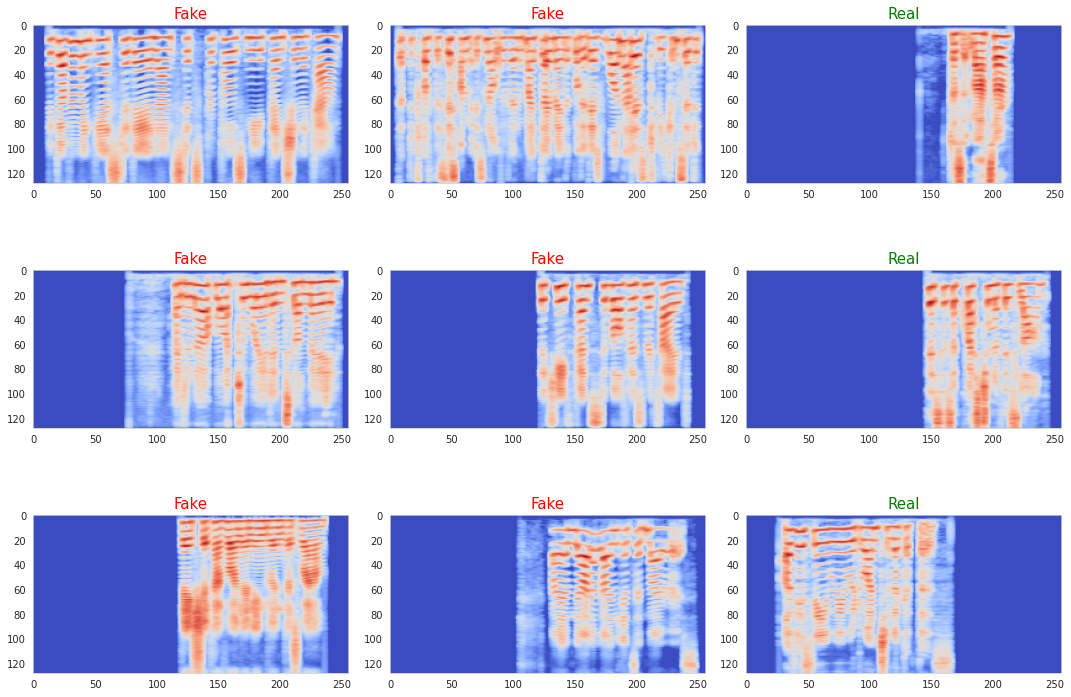

In [ ]:
ds = get_dataset(TRAIN_FILENAMES[:2], augment=False, cache=False, repeat=False).take(1)
batch = next(iter(ds.unbatch().batch(20)))
imgs, tars = batch
print(f'image_shape: {imgs.shape} target_shape:{tars.shape}')
print(f'image_dtype: {imgs.dtype} target_dtype:{tars.dtype}')
display_batch(batch, row=3, col=3)

## With Augmentation

image_shape: (20, 256, 128, 1) target_shape:(20,)
image_dtype: <dtype: 'float32'> target_dtype:<dtype: 'float32'>


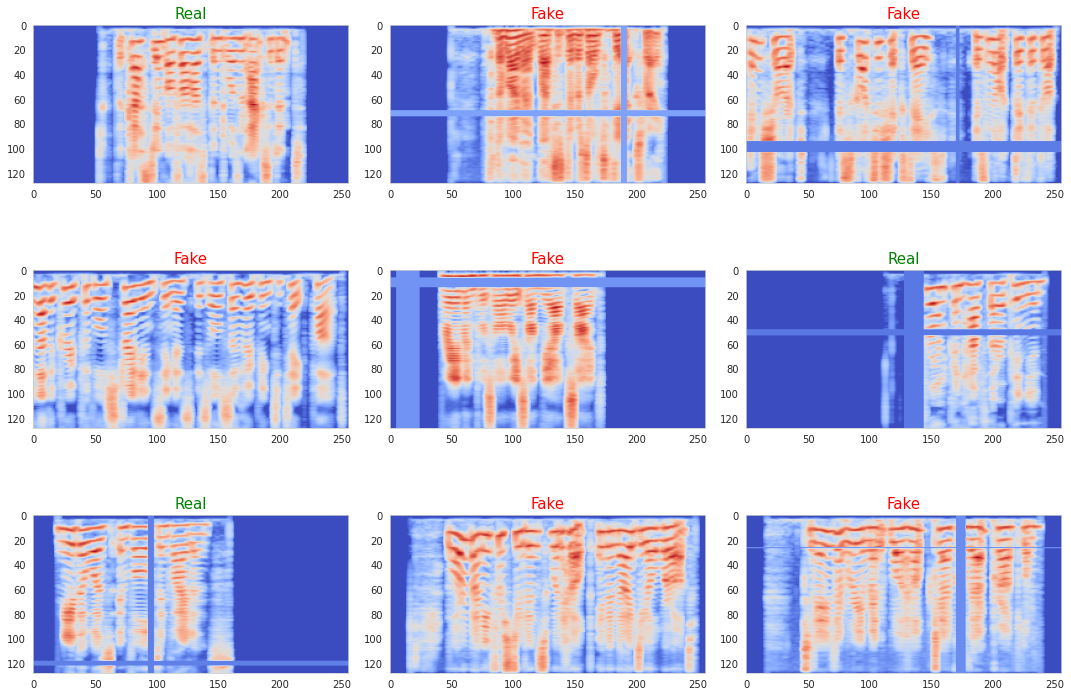

In [ ]:
ds = get_dataset(TRAIN_FILENAMES[:2], augment=True, cache=False, repeat=False).take(1)
batch = next(iter(ds.unbatch().batch(20)))
imgs, tars = batch
print(f'image_shape: {imgs.shape} target_shape:{tars.shape}')
print(f'image_dtype: {imgs.dtype} target_dtype:{tars.dtype}')
display_batch(batch, row=3, col=3)

# 11. Loss & Metric 📉
We will use `binary_crossentropy` loss as our loss_function and `f1_score` as our primary metric. We will also use `precision`, `recall` & `accuracy` to compare performance of our model.
> **Note:** One of the key difference between Loss and Metric is that loss must be **differentiable**. Hence, loss is directly used to optimize our model. This is the reason why we can't use `f1_score` or `accuracy` as metric. Hence, we keep an eye on the metrics to compare model's performance. 

* Precision
$$ 
Precision = \frac{TP}{TP + FP}
$$
* Recall
$$ 
Recall = \frac{TP}{TP + FN}
$$
* F1_Score
$$
F1\_Score = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$
* Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [ ]:
def get_metrics():
    acc = tf.keras.metrics.BinaryAccuracy()
    f1_score = tfa.metrics.F1Score(num_classes=1, threshold=0.5, average='macro')
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()
    return [acc, precision, recall, f1_score]

# 12. LR Schedule ⚓
* Learning Rate scheduler for transfer learning. 
* The learning rate starts from `lr_start`, then decreases to a`lr_min` using different methods namely,
    * **step**: Reduce lr step wise like stair.
    * **cosine**: Follow Cosine graph to reduce lr.
    * **exp**: Reduce lr exponentially.

In [ ]:
import math

def get_lr_callback(mode='exp', batch_size=64, epochs=30, plot=False):
    """adapted from @cdeotte"""
    lr_start = 5e-5
    lr = 0.001 # base_lr
    lr_max = 5e-4 # max lr - will be multiplied by batch_size
    lr_min = 0.1e-4 # min lr
    lr_ramp_ep = 4 # warming up epochs
    lr_sus_ep = 0 # sustain epochs lr after warming up
    lr_decay = 0.8 # decay rate

    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max

        elif mode == 'exp':
            lr = (lr_max - lr_min) * lr_decay**(epoch - \
                  lr_ramp_ep - lr_sus_ep) + lr_min

        elif mode == 'step':
            lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)

        elif mode == 'cosine':
            decay_total_epochs = epochs - lr_ramp_ep - lr_sus_ep + 3
            decay_epoch_index = epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            cosine_decay = 0.5 * (1 + math.cos(phase))
            lr = (lr_max - lr_min) * cosine_decay + lr_min
        return lr

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(
            np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch')
        plt.ylabel('learnig rate')
        plt.title('Learning Rate Scheduler')
    return tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=0)

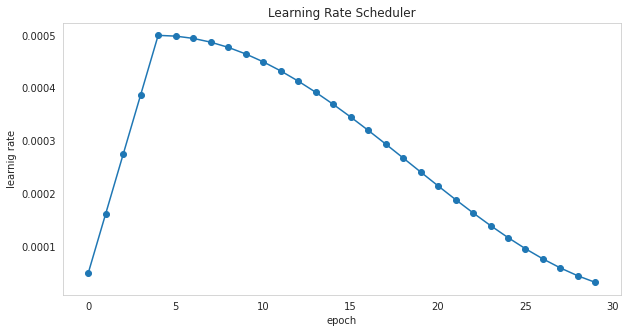

In [ ]:
lr_callback = get_lr_callback(mode=CFG.lr_schedule,epochs=30,plot=True)

In [ ]:
import audio_classification_models as acm

URL = 'https://github.com/awsaf49/audio_classification_models/releases/download/v1.0.8/conformer-encoder.h5'

def Conformer(input_shape=(128, 80, 1),num_classes=1, final_activation='sigmoid', pretrain=True):
    """Souce Code: https://github.com/awsaf49/audio_classification_models"""
    inp = tf.keras.layers.Input(shape=input_shape)
    backbone = acm.ConformerEncoder()
    out = backbone(inp)
    if pretrain:
        acm.utils.weights.load_pretrain(backbone, url=URL)
    out = tf.keras.layers.GlobalAveragePooling1D()(out)
#     out = tf.keras.layers.Dense(32, activation='selu')(out)
    out = tf.keras.layers.Dense(num_classes, activation=final_activation)(out)
    model = tf.keras.models.Model(inp, out)
    return model

## Build Model
* Build complete model.
* Select Loss, LR_Scheduling, Metrics and so on.
* Compile model for training.

In [ ]:
def get_model(name=CFG.model_name, loss=CFG.loss,):
    model = Conformer(input_shape=[*CFG.spec_shape,1],pretrain=True)
    lr = CFG.lr
    if CFG.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif CFG.optimizer == "AdamW":
        opt = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=lr)
    elif CFG.optimizer == "RectifiedAdam":
        opt = tfa.optimizers.RectifiedAdam(learning_rate=lr)
    else:
        raise ValueError("Wrong Optimzer Name")
    model.compile(
        optimizer=opt,
        loss=loss,
        steps_per_execution=CFG.steps_per_execution, # to reduce idle time
        metrics=get_metrics()
    )
    return model

In [ ]:
model = get_model()
model.summary()

35545088/35530456 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 128, 1)]     0         
_________________________________________________________________
conformer_encoder (Conformer (None, None, 144)         8959680   
_________________________________________________________________
global_average_pooling1d (Gl (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 145       
Total params: 8,959,825
Trainable params: 8,955,217
Non-trainable params: 4,608
_________________________________________________________________


In [ ]:
if CFG.wandb:
    "login in wandb otherwise run anonymously"
    try:
        # Addo-ons > Secrets > WANDB
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        api_key = user_secrets.get_secret("WANDB")
        wandb.login(key=api_key)
        anonymous = None
    except:
        anonymous = "must"


def wandb_init():
    "initialize project on wandb"
    id_ = wandb.util.generate_id() # generate random id
    config = {k: v for k, v in dict(vars(CFG)).items() if "__" not in k} # convert class to dict
    config["id"] = id_
    run = wandb.init(
        id=id_,
        project="fake-speech-detection",
        name=f"dim-{CFG.spec_shape[0]}x{CFG.spec_shape[1]}|model-{CFG.model_name}",
        config=config,
        anonymous=anonymous,
        group=CFG.comment,
        reinit=True,
        resume="allow",
    )
    return run

# 15. Training 🚅
Our model will be trained on the `train` data and `valid` data will be used to save `checkpoint`. Finally, we'll check our model's performance on `test` data.

############################################################
#### IMAGE_SIZE: (256, 128) | BATCH_SIZE: 32 | EPOCHS: 12
#### MODEL: Conformer | LOSS: binary_crossentropy
#### NUM_TRAIN: 5,000 | NUM_VALID: 4,000
############################################################


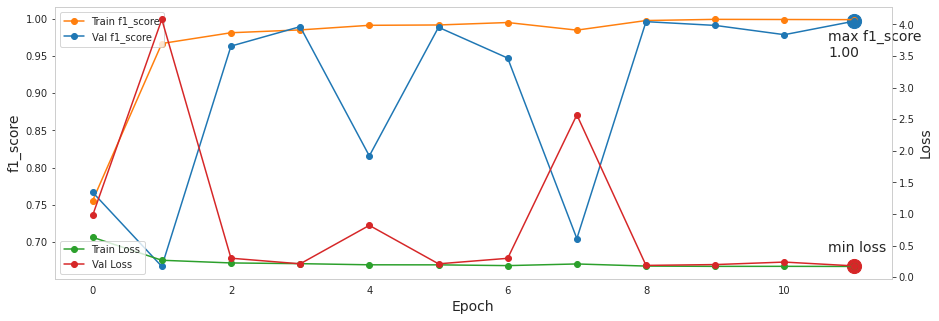

In [ ]:
# Initialize wandb Run
if CFG.wandb:
    run = wandb_init()
    WandbCallback = wandb.keras.WandbCallback(save_model=False)
    
# Load gcs_path of train, valid & test
TRAIN_FILENAMES = tf.io.gfile.glob('asvspoof/train*.tfrec')
VALID_FILENAMES = tf.io.gfile.glob('asvspoof/valid*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob('asvspoof/test*.tfrec')

# Take Only 10 Files if run in Debug Mode
if CFG.debug:
    TRAIN_FILENAMES = TRAIN_FILENAMES[:2]
    VALID_FILENAMES = VALID_FILENAMES[:2]
    TEST_FILENAMES = TEST_FILENAMES[:2]

# Shuffle train files
random.shuffle(TRAIN_FILENAMES)

# Count train and valid samples
NUM_TRAIN = count_data_items(TRAIN_FILENAMES)
NUM_VALID = count_data_items(VALID_FILENAMES)
NUM_TEST = count_data_items(TEST_FILENAMES)

# Compute batch size & steps_per_epoch
BATCH_SIZE = CFG.batch_size * REPLICAS
STEPS_PER_EPOCH = NUM_TRAIN // BATCH_SIZE

print("#" * 60)
print("#### IMAGE_SIZE: (%i, %i) | BATCH_SIZE: %i | EPOCHS: %i"% (CFG.spec_shape[0],
                                                                  CFG.spec_shape[1],
                                                                  BATCH_SIZE,
                                                                  CFG.epochs))
print("#### MODEL: %s | LOSS: %s"% (CFG.model_name, CFG.loss))
print("#### NUM_TRAIN: {:,} | NUM_VALID: {:,}".format(NUM_TRAIN, NUM_VALID))
print("#" * 60)

# Log in w&B before training
if CFG.wandb:
    wandb.log(
        {
            "num_train": NUM_TRAIN,
            "num_valid": NUM_VALID,
            "num_test": NUM_TEST,
        }
    )

# Build model in device
K.clear_session()
with strategy.scope():
    model = get_model(name=CFG.model_name,loss=CFG.loss)

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "ckpt.h5",
    verbose=CFG.verbose,
    monitor="val_f1_score",
    mode="max",
    save_best_only=True,
    save_weights_only=True,
)
callbacks = [checkpoint, get_lr_callback(mode=CFG.lr_schedule,epochs=CFG.epochs)]

if CFG.wandb:
    # Include w&b callback if WANDB is True
    callbacks.append(WandbCallback)

# Create train & valid dataset
train_ds = get_dataset(
    TRAIN_FILENAMES,
    augment=CFG.augment,
    batch_size=BATCH_SIZE,
    cache=False,
    drop_remainder=False,
)
valid_ds = get_dataset(
    VALID_FILENAMES,
    shuffle=False,
    augment=False,
    repeat=False,
    batch_size=BATCH_SIZE,
    cache=False,
    drop_remainder=False,
)

# Train model
history = model.fit(
    train_ds,
    epochs=CFG.epochs if not CFG.debug else 2,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=callbacks,
    validation_data=valid_ds,
    #         validation_steps = NUM_VALID/BATCH_SIZE,
    verbose=CFG.verbose,
)

# Convert dict history to df history
history = pd.DataFrame(history.history)

# Load best weights
model.load_weights("ckpt.h5")

# Plot Training History
if CFG.display_plot:
    plot_history(history)

# 16. Performance 🎭
We'll compute **Accuracy**, **Precision**, **Recall** and **F1_Score** for both `valid` and `test` data. Finally, we'l plot `confusion_matrix` to get better insight about model's performance regarding **FP** and **FN**.


>> Valid Result:
125/125 [==============================] - 29s 223ms/step - loss: 0.1798 - binary_accuracy: 0.9970 - precision: 0.9995 - recall: 0.9945 - f1_score: 0.9970


>> Test Result:
125/125 [==============================] - 29s 224ms/step - loss: 2.5210 - binary_accuracy: 0.7203 - precision: 0.9922 - recall: 0.4440 - f1_score: 0.6135

125/125 [==============================] - 35s 220ms/step


  0%|          | 0/4000 [00:00<?, ?it/s]


>> Confusoin Matrix


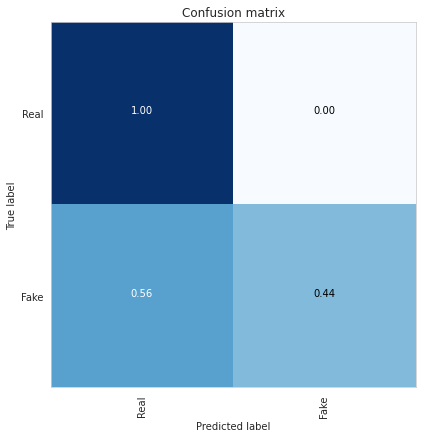

In [ ]:
# Load best weights
model.load_weights("ckpt.h5")

# Compute & save best Test result
print("\n>> Valid Result:")
valid_result = model.evaluate(
    get_dataset(
        VALID_FILENAMES,
        batch_size=BATCH_SIZE,
        augment=False,
        shuffle=False,
        repeat=False,
        cache=False,
    ),
    return_dict=True,
    verbose=1,
)
print()

# Compute & save best Test result
print("\n>> Test Result:")
test_result = model.evaluate(
    get_dataset(
        TEST_FILENAMES,
        batch_size=BATCH_SIZE,
        augment=False,
        shuffle=False,
        repeat=False,
        cache=False,
    ),
    return_dict=True,
    verbose=1,
)
print()

# Log in wandb
if CFG.wandb:
    best_epoch = np.argmax(history["val_f1_score"]) + 1
    wandb.log({"best": {"valid":valid_result,
                        "test":test_result,
                        "epoch":best_epoch}})
    wandb.run.finish()

# Get Prediction for test data
test_ds = get_dataset(TEST_FILENAMES,
    shuffle=False,
    augment=False,
    repeat=False,
    batch_size=BATCH_SIZE,
    cache=False,
    drop_remainder=False,
    return_id=False,
    return_label=False,
)
test_preds = model.predict(test_ds, verbose=1, steps=NUM_TEST/BATCH_SIZE)

# Extract test metadata from tfrecord
test_ds = get_dataset(TEST_FILENAMES,
    shuffle=False,
    augment=False,
    repeat=False,
    batch_size=1,
    cache=False,
    drop_remainder=False,
    return_id=True,
    return_label=True,
)
info = [(id_.numpy()[0].decode('utf-8'),label.numpy()[0]) for _,label,id_ in tqdm(iter(test_ds),total=NUM_TEST)]
test_ids, test_labels = list(zip(*info))

# Plot Confusion Matrix
print("\n>> Confusoin Matrix")
cm = confusion_matrix(test_labels, test_preds.reshape(-1).round())
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, ["Real","Fake"],normalize=True)